# Capstone - FSR 1 Data Analysis
### Sunday, April 7, 2024

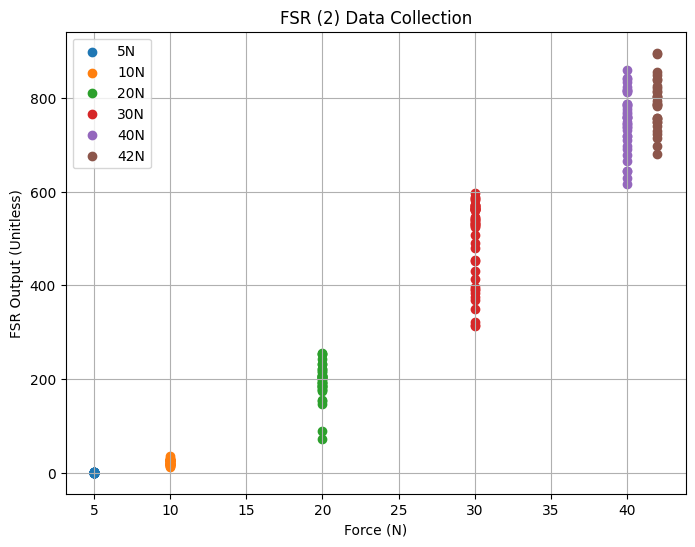

In [9]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def get_fsr_data(filename: str):
    datafile = pd.read_csv(filename)

    N42 = datafile.iloc[:, 1].to_numpy()
    N40 = datafile.iloc[:, 3].to_numpy()
    N30 = datafile.iloc[:, 5].to_numpy()
    N20 = datafile.iloc[:, 7].to_numpy()
    N10 = datafile.iloc[:, 9].to_numpy()
    N5  = datafile.iloc[:, 11].to_numpy()

    # remove all NaN values
    N42 = N42[~np.isnan(N42)]
    N40 = N40[~np.isnan(N40)]
    N30 = N30[~np.isnan(N30)]
    N20 = N20[~np.isnan(N20)]
    N10 = N10[~np.isnan(N10)]
    N5 = N5[~np.isnan(N5)]


    return N42, N40, N30, N20, N10, N5

def get_fsr_labels(filename: str):
    datafile = pd.read_csv(filename)

    N42_label = datafile.iloc[:, 0].to_numpy()
    N40_label = datafile.iloc[:, 2].to_numpy()
    N30_label = datafile.iloc[:, 4].to_numpy()
    N20_label = datafile.iloc[:, 6].to_numpy()
    N10_label = datafile.iloc[:, 8].to_numpy()
    N5_label  = datafile.iloc[:, 10].to_numpy()

    # remove all NaN values
    N42_label = N42_label[~np.isnan(N42_label)]
    N40_label = N40_label[~np.isnan(N40_label)]
    N30_label = N30_label[~np.isnan(N30_label)]
    N20_label = N20_label[~np.isnan(N20_label)]
    N10_label = N10_label[~np.isnan(N10_label)]
    N5_label = N5_label[~np.isnan(N5_label)]

    return N42_label, N40_label, N30_label, N20_label, N10_label, N5_label

N42, N40, N30, N20, N10, N5 = get_fsr_data('FSR2.csv')
N42_label, N40_label, N30_label, N20_label, N10_label, N5_label = get_fsr_labels('FSR2.csv')

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(N5_label, N5, label='5N')
ax.scatter(N10_label, N10, label='10N')
ax.scatter(N20_label, N20, label='20N')
ax.scatter(N30_label, N30, label='30N')
ax.scatter(N40_label, N40, label='40N')
ax.scatter(N42_label, N42, label='42N')
ax.legend()
ax.grid()
ax.set_xlabel('Force (N)')
ax.set_ylabel('FSR Output (Unitless)')
ax.set_title('FSR (2) Data Collection')
plt.show()


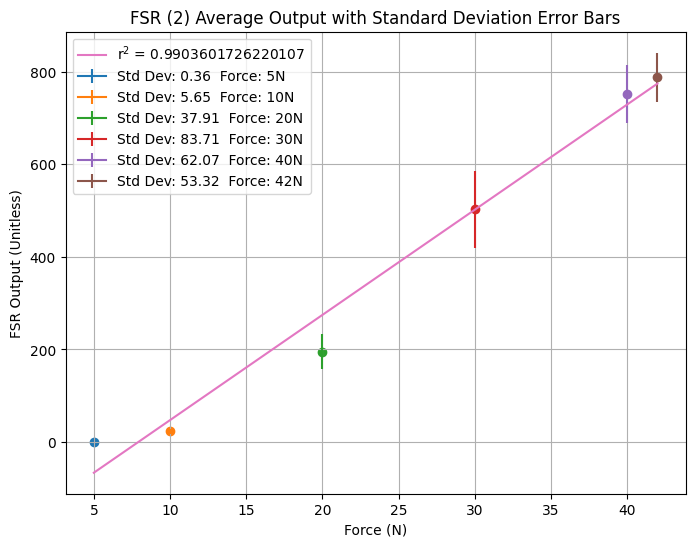

In [19]:
avg_N5 = np.mean(N5)
avg_N10 = np.mean(N10)
avg_N20 = np.mean(N20)
avg_N30 = np.mean(N30)
avg_N40 = np.mean(N40)
avg_N42 = np.mean(N42)

std_dev_N5 = np.std(N5)
std_dev_N10 = np.std(N10)
std_dev_N20 = np.std(N20)
std_dev_N30 = np.std(N30)
std_dev_N40 = np.std(N40)
std_dev_N42 = np.std(N42)

x = (5, 10, 20, 30, 40, 42)
y = (avg_N5, avg_N10, avg_N20, avg_N30, avg_N40, avg_N42)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(5, avg_N5, std_dev_N5, label=f'Std Dev: {round(std_dev_N5, 2)}  Force: 5N')
ax.errorbar(10, avg_N10, std_dev_N10, label=f'Std Dev: {round(std_dev_N10, 2)}  Force: 10N')
ax.errorbar(20, avg_N20, std_dev_N20, label=f'Std Dev: {round(std_dev_N20, 2)}  Force: 20N')
ax.errorbar(30, avg_N30, std_dev_N30, label=f'Std Dev: {round(std_dev_N30, 2)}  Force: 30N')
ax.errorbar(40, avg_N40, std_dev_N40, label=f'Std Dev: {round(std_dev_N40, 2)}  Force: 40N')
ax.errorbar(42, avg_N42, std_dev_N42, label=f'Std Dev: {round(std_dev_N42, 2)}  Force: 42N')
ax.scatter(5, avg_N5)
ax.scatter(10, avg_N10)
ax.scatter(20, avg_N20)
ax.scatter(30, avg_N30)
ax.scatter(40, avg_N40)
ax.scatter(42, avg_N42)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), label=f'r$^2$ = {r_value}')
ax.legend()
ax.grid()
ax.set_xlabel('Force (N)')
ax.set_ylabel('FSR Output (Unitless)')
ax.set_title('FSR (2) Average Output with Standard Deviation Error Bars')
plt.show()
